## **Problem 1: Getting Familiar with the applications of Image Interpolation**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# A.

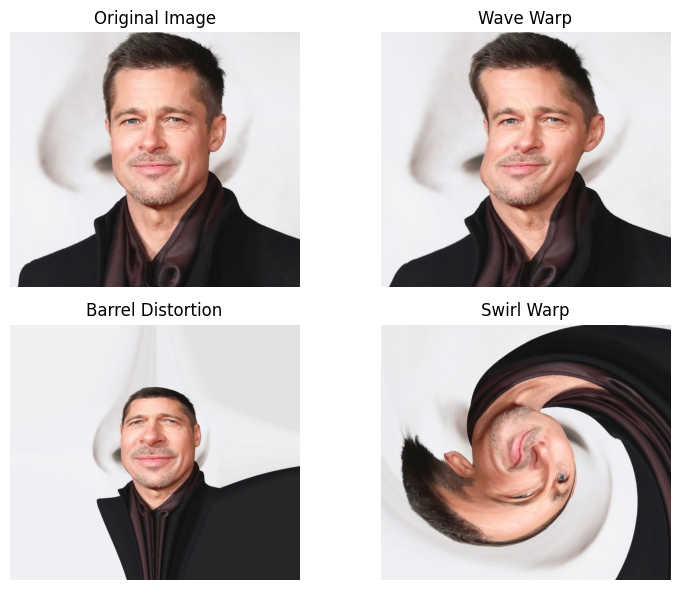

In [2]:
# Load and convert the image to RGB
image = cv2.imread('Brad.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h, w = image.shape[:2]   # Image dimensions
center_x, center_y = w // 2, h // 2

# Sinusoidal Horizontal Wave Warp
def wave_warp(image, amplitude_ratio=0.03, frequency=2):
    amplitude = h * amplitude_ratio
    y = np.arange(h).reshape(-1, 1)
    offset_x = amplitude * np.sin(2 * np.pi * y / (h / frequency))
    map_x = np.tile(np.arange(w), (h, 1)) + offset_x
    map_y = np.tile(np.arange(h).reshape(-1, 1), (1, w))

    # Clamp x-coordinates and y-coordinates
    map_x = np.clip(map_x, 0, w - 1)
    map_y = np.clip(map_y, 0, h - 1)
    return cv2.remap(image, map_x.astype(np.float32), map_y.astype(np.float32), interpolation=cv2.INTER_LINEAR)

# Barrel Distortion Warp
def barrel_warp(image, k_scale=1e-4):
    k = k_scale * (w * h) / 1e6  # Adaptive distortion factor
    y, x = np.indices((h, w))
    dx = x - center_x
    dy = y - center_y
    r = np.sqrt(dx**2 + dy**2)
    factor = 1 + k * r**2
    map_x = center_x + dx * factor
    map_y = center_y + dy * factor

    # Clamp x-coordinates and y-coordinates
    map_x = np.clip(map_x, 0, w - 1)
    map_y = np.clip(map_y, 0, h - 1)
    return cv2.remap(image, map_x.astype(np.float32), map_y.astype(np.float32), interpolation=cv2.INTER_LINEAR)

# Swirl Warp
def swirl_warp(image, strength=5, radius=300):
    y, x = np.indices((h, w))
    dx = x - center_x
    dy = y - center_y
    r = np.sqrt(dx**2 + dy**2)
    angle = np.arctan2(dy, dx) + strength * np.exp(-r / radius)
    map_x = center_x + r * np.cos(angle)
    map_y = center_y + r * np.sin(angle)

    # Clamp x-coordinates and y-coordinates
    map_x = np.clip(map_x, 0, w - 1)
    map_y = np.clip(map_y, 0, h - 1)
    return cv2.remap(image, map_x.astype(np.float32), map_y.astype(np.float32), interpolation=cv2.INTER_LINEAR)

# Apply transformations
wave_image = wave_warp(image)
barrel_image = barrel_warp(image)
swirl_image = swirl_warp(image)

images = [("Original Image", image),
          ("Wave Warp", wave_image),
          ("Barrel Distortion", barrel_image),
          ("Swirl Warp", swirl_image)]


plt.figure(figsize=(8, 6))
for i, (title, image) in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.title(title, fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()

# B.

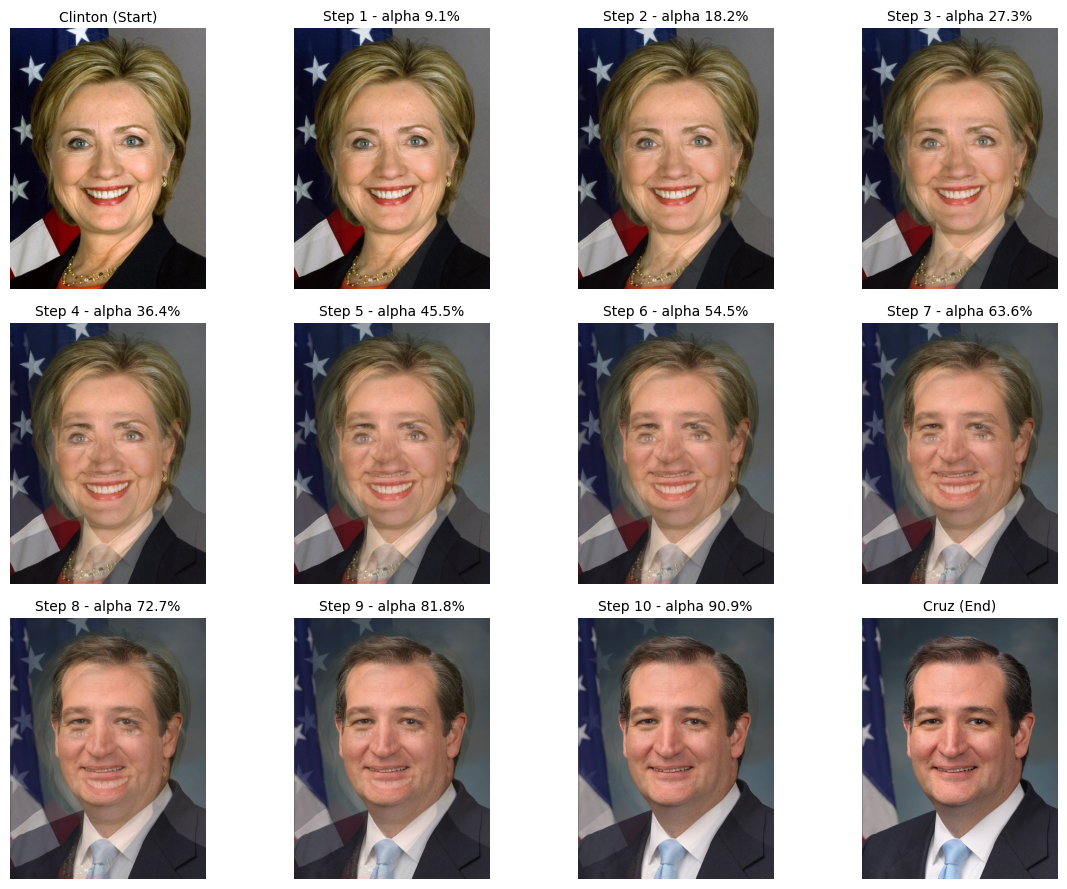

In [3]:
# Load and convert the image to RGB
image_start = cv2.imread('Clinton.jpg')
image_end = cv2.imread('Cruz.jpg')

image_start = cv2.cvtColor(image_start, cv2.COLOR_BGR2RGB)
image_end = cv2.cvtColor(image_end, cv2.COLOR_BGR2RGB)

# Resize target image to match source
h, w = image_start.shape[:2]
image_end = cv2.resize(image_end, (w, h))

# Alpha-based cross-dissolve between two images
def morph_images(image1, image2, alpha):
    return (1 - alpha) * image1 + alpha * image2

# Generate intermediate frames
num_intermediate = 10
alpha_values = np.linspace(0, 1, num_intermediate + 2)  
morphed_images = []
titles = []

# Generate morphed frames
for i, alpha in enumerate(alpha_values):
    morphed_image = morph_images(image_start, image_end, alpha)
    morphed_images.append(morphed_image.astype(np.uint8))  
    if i == 0:
        titles.append("Clinton (Start)")
    elif i == len(alpha_values) - 1:
        titles.append("Cruz (End)")
    else:
        titles.append(f"Step {i} - alpha {alpha:.1%}")

# Display result
plt.figure(figsize=(12, 9))
for i, (image, title) in enumerate(zip(morphed_images, titles)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(image)
    plt.title(title, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()